In [24]:
from __future__ import print_function, division

In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import selenium
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [2]:
# initializing the data frame
columns = ['summoner_name', 'rank', 'hours_played', 'champ_pool', 'percent_games_duo', 'avg_kda']
initial_data = pd.DataFrame(columns = columns)

In [3]:
pd.read_html('https://na.op.gg/ranking/ladder/')

[    Unnamed: 0         Summoners        Tier        LP  Level  Win Ratio
 0            6           1 Shady  Challenger  1,226 LP    283  68461153%
 1            7          iKingVex  Challenger  1,223 LP    356  56648854%
 2            8            JuIius  Challenger  1,203 LP    354  61152454%
 3            9        unrequ1ted  Challenger  1,184 LP    248  43735056%
 4           10     Rank 1 GIobal  Challenger  1,162 LP     63  22113562%
 5           11         FLY V1per  Challenger  1,113 LP    248  49141454%
 6           12      TSM Tactical  Challenger  1,110 LP     82  27115863%
 7           13  Pants are Dragon  Challenger  1,091 LP    224  41133055%
 8           14         From Iron  Challenger  1,082 LP     92  35224759%
 9           15          TSM Zven  Challenger  1,080 LP    246  51039456%
 10          16      Adrian Seira  Challenger  1,053 LP    138  48342353%
 11          17          Scoooped  Challenger  1,050 LP    153  45739154%
 12          18            deftIy  Cha

In [26]:
requests.__path__

['/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/requests']

In [219]:
import requests

url = 'https://na.op.gg/summoner/userName=FriedenInGeduld'
response = requests.get(url)
print(response.text)

	<!DOCTYPE html>
	<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
<head>
	<!-- Google Tag Manager -->
	<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');</script>
	<!-- End Google Tag Manager -->
	

In [220]:
from bs4 import BeautifulSoup

page = response.text
soup = BeautifulSoup(page, 'lxml')

In [33]:
print(soup.prettify())

<!DOCTYPE html>
<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');
  </script>
  <!-- End Google Tag Mana

In [93]:
url2 = 'https://na.op.gg/ranking/ladder/page=1'
response2 = requests.get(url2)
print(response2.text)

	<!DOCTYPE html>
	<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
<head>
	<!-- Google Tag Manager -->
	<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');</script>
	<!-- End Google Tag Manager -->
	

In [94]:
page2 = response2.text
soup2 = BeautifulSoup(page2, 'lxml')
print(soup2.prettify())

<!DOCTYPE html>
<!--
	  ,ad8888ba,   88888888ba         ,ad8888ba,    ,ad8888ba,
	 d8"'    `"8b  88      "8b       d8"'    `"8b  d8"'    `"8b
	d8'        `8b 88      ,8P      d8'           d8'
	88          88 88aaaaaa8P'      88            88
	88          88 88""""""'        88      88888 88      88888
	Y8,        ,8P 88               Y8,        88 Y8,        88
	 Y8a.    .a8P  88                Y8a.    .a88  Y8a.    .a88
	  `"Y8888Y"'   88     dev@op.gg   `"Y88888P"    `"Y88888P"

		 Copyright © 2013-2019 OP.GG. All rights reserved.
-->
<html lang="en_US">
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
	new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
	j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
	'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
	})(window,document,'script','dataLayer','GTM-WXXJDMH');
  </script>
  <!-- End Google Tag Mana

In [234]:
# get summoner name
name_list = pd.read_html('https://na.op.gg/ranking/ladder/page=1')
name_list[0]['Summoners'][3]

'Fanatiik'

In [237]:
# get rank
#rank = soup.find(property='og:description').get('content', np.NaN).split('/')[1]
rank = (2000000*name_list[0]['Unnamed: 0'][3])**3
print(rank)

2828872707781689344


In [86]:
# get total # games played
num_wins = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[0][:-1]))
num_losses = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[1][:-1]))
num_games = num_wins + num_losses
print(str(num_games))

535


In [221]:
# get champ pool
champ_pool = 0
champs_list = soup.find(property='og:description').get('content', np.NaN).split(',')
for champ in champs_list:
    print(champ)
    champ_losses = int(str(champ.split()[-5][:-1]))
    champ_wins = int(str(champ.split()[-4][:-1]))
    champ_total_games = champ_losses + champ_wins
    print(champ_total_games)
    if(champ_total_games / num_games >= 0.2):
        champ_pool += 1
print(champ_pool)

FriedenInGeduld / Silver 1 86LP / 64W 43L Win Ratio 60% / Thresh - 24W 13L Win Ratio 65%
37
 Soraka - 14W 3L Win Ratio 82%
17
 Lux - 10W 5L Win Ratio 67%
15
 Jhin - 4W 7L Win Ratio 36%
11
 Ashe - 4W 4L Win Ratio 50%
8
0


In [276]:
# get winrate
int(soup.find("span", {"class": "winratio"}).text[-3:-1])

60

In [306]:
# get avg kda
num_kdas = len(soup.find_all("span", {"class": "KDA"}))
kdas = soup.find_all("span", {"class": "KDA"})
total_kda, avg_kda = 0, 0
for kda in range(0, num_kdas):
    total_kda += float(kdas[kda].text[0:-2])

avg_kda = total_kda/num_kdas
avg_kda
    


2.434285714285714

In [307]:
# get avg cs
#soup.find_all("div", {"class": "ChampionName"})[0].findNextSibling()
num_cs = len(soup.find_all(class_ = 'ChampionMinionKill tip'))
all_cs = soup.find_all(class_ = 'ChampionMinionKill tip')
total_cs, avg_cs = 0, 0
for cs in range(0, num_cs):
    total_cs += float(all_cs[cs].text.strip().split()[1])

avg_cs = total_cs/num_cs
avg_cs
#soup.find_all(class_ = 'ChampionMinionKill tip')

83.91428571428571

In [181]:
# get total hours played
url3 = 'https://wol.gg/stats/br/theoldestgamer/'
response3 = requests.get(url3)
#pd.read_html('https://wol.gg/stats/br/theoldestgamer/')
page3 = response3.text
soup3 = BeautifulSoup(page3, 'lxml')
#print(soup3.prettify())
#time_played

<p>14,946<br/><b>hours</b></p>

In [189]:
str(soup3.find(id='time-hours').find('p')).split('<')[1][2:]

'14,946'

In [314]:
def scrape_data(num_pages, users_per_page):
    '''
    Scrape summoner_name, rank, hours_played, and champ_pool
    from the web.
    ----
    Parameters:
    num_pages: total number of pages to use for name lookups
    users_per_page: how many users to gather per page
    
    Returns:
    DataFrame with columns 'columns'
    '''
    opgg_leaderboard_url = 'https://na.op.gg/ranking/ladder/page='
    opgg_user_url = 'https://na.op.gg/summoner/userName='
    wol_user_url = 'https://wol.gg/stats/na/' # remember to add a '/' after username
    
    # make base dataframe
    df = pd.DataFrame()
    list_of_data = []
    
    # pull list of user names
    for page in range(0,num_pages):
        site_name_list = pd.read_html(opgg_leaderboard_url+str(np.random.randint(1,14396)))
        rand_indices = random.sample(range(0, 95), users_per_page)
        for user in rand_indices:
            # add [summoner name, rank] to list
            # rank is calculated as (1,446,288 - rank)^3
            # ((total number of users on leaderboard + 1) - (actual rank))^3 (inflated to reflect true diffs in rank)
            list_of_data.append([site_name_list[0]['Summoners'][user], 
                                 (1446288-int(site_name_list[0]['Unnamed: 0'][user]))**3])
            # add rank to list
            #list_of_data.append([site_name_list[0]['Unnamed: 0'][user]])
    
    #print(list_of_data)
    # add total champ pool to list        
    for datum in list_of_data:
        url = 'https://na.op.gg/summoner/userName=' + datum[0].replace(' ', '+')
        response = requests.get(url)
        page = response.text
        soup = BeautifulSoup(page, 'lxml')
        
        #datum.append(soup.find(property='og:description').get('content', np.NaN).split('/')[1])
        
        print(soup.find(property='og:description').get('content', np.NaN).split('/'))
        if(len(soup.find(property='og:description').get('content', np.NaN).split('/')) >= 3):
            num_wins = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[0][:-1]))
            num_losses = int(str(soup.find(property='og:description').get('content', np.NaN).split('/')[2].split()[1][:-1]))
            num_games = num_wins + num_losses
            champ_pool = 0
            champs_list = soup.find(property='og:description').get('content', np.NaN).split(',')
            for champ in champs_list:
                ##print(str(champ.split())+' : ' + str(champ.split()[-5][:-1]))
                if(str(champ.split()[-5][:-1]) == 'Rati' ):
                    champ_losses = 0
                    champ_wins = 0
                else:
                    champ_losses = int(str(champ.split()[-5][:-1]))
                    champ_wins = int(str(champ.split()[-4][:-1]))
                champ_total_games = champ_losses + champ_wins
                if(champ_total_games / num_games >= 0.2):
                    champ_pool += 1
        else:
            champ_pool = 0
        datum.append(champ_pool)
        
        # add winrate to list
        print('winrate text: ')
        print(soup.find("span", {"class": "winratio"}).text)
        datum.append(int(soup.find("span", {"class": "winratio"}).text[-3:-1]))
        
        # add avg_kda to list
        print('kda text: ')
        print(soup.find_all("span", {"class": "KDA"}))
        num_kdas = len(soup.find_all("span", {"class": "KDA"}))
        if num_kdas > 0:
            kdas = soup.find_all("span", {"class": "KDA"})
            total_kda, avg_kda = 0, 0
            for kda in range(0, num_kdas):
                total_kda += float(kdas[kda].text[0:-2])
            avg_kda = total_kda/num_kdas
        else:
            avg_kda = np.NaN
        datum.append(avg_kda)
        
        # add avg_cs to list
        print('cs text: ')
        print(soup.find_all(class_ = 'ChampionMinionKill tip'))
        num_cs = len(soup.find_all(class_ = 'ChampionMinionKill tip'))
        if num_cs > 0:
            all_cs = soup.find_all(class_ = 'ChampionMinionKill tip')
            total_cs, avg_cs = 0, 0
            for cs in range(0, num_cs):
                total_cs += float(all_cs[cs].text.strip().split()[1])

            avg_cs = total_cs/num_cs
        else:
            avg_cs = np.NaN
        datum.append(avg_cs)
        
        # pull hours played from wol, add to list
        url2 = 'https://wol.gg/stats/na/'+datum[0].replace(' ', '')+'/'
        response2 = requests.get(url2)
        page2 = response2.text
        soup2 = BeautifulSoup(page2, 'lxml')
        if(soup2.find(id='time-hours') != None):
            datum.append(int(str(soup2.find(id='time-hours').find('p')).split('<')[1][2:].replace(',', '')))
        else:
            datum.append(np.NaN)
    #print(list_of_data)
    
    df = df.append(list_of_data, ignore_index=True)
    df.columns = columns
    return df

In [163]:
#check challenges for how to add data to df bit by bit
test_df = pd.DataFrame()
list_of_data = [[name_list[0]['Summoners'][8], 'Diamond 3 0LP', 2, 3567],
               [name_list[0]['Summoners'][3], 'Diamond 2 40LP', 3, 1123],
               [name_list[0]['Summoners'][23], 'Diamond 4 40LP', 2, 4104]]
test_df = test_df.append(list_of_data, ignore_index=True)
test_df.columns = columns
#test_df = pd.DataFrame(list_of_data, columns=columns)
#test_df = test_df.append(pd.Series([name_list[0]['Summoners'][3]], index=['summoner_name'], ), ignore_index=True)
#test_df['summoner_name'] = test_df.append(pd.Series([name_list[0]['Summoners'][8]], index=['summoner_name']), ignore_index=True)
#test_df['summoner_name'] = test_df.append(pd.Series([name_list[0]['Summoners'][14]], index=['summoner_name']), ignore_index=True)
#test_df['summoner_name'] = test_df.append(pd.Series([name_list[0]['Summoners'][39]], index=['summoner_name']), ignore_index=True)
test_df

,summoner_name,rank,champ_pool,hours_played
0,deftIy,Diamond 3 0LP,2,3567
1,JuIius,Diamond 2 40LP,3,1123
2,insanity,Diamond 4 40LP,2,4104


In [202]:
from datetime import datetime, timedelta

In [312]:
example_data_to_model = scrape_data(1, 5)
example_data_to_model

['Ittö Rasetsu ', ' Grandmaster 226LP ', ' 50W 43L Win Ratio 54% ', ' Irelia - 6W 5L Win Ratio 55%, Neeko - 7W 3L Win Ratio 70%, Mordekaiser - 6W 3L Win Ratio 67%, Camille - 6W 2L Win Ratio 75%, Hecarim - 4W 3L Win Ratio 57%']
winrate text: 
Win Ratio 54%
kda text: 
[<span class="KDA">2.17:1</span>, <span class="KDA">2.17:1</span>, <span class="KDA">2.20:1</span>, <span class="KDA">2.82:1</span>, <span class="KDA">1.98:1</span>, <span class="KDA">1.97:1</span>, <span class="KDA">1.52:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 230.8 (8.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 162.4 (6.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 192.4 (6.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 150.4 (6.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 126.3 (5.0)
							</d

,summoner_name,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
0,Ittö Rasetsu,3020454616324608000,0,54,2.118571,174.471429,3790
1,Lunarly,3020868361772890056,0,54,2.395714,193.371429,2151
2,Yeonbee,3020417004975456744,0,52,2.865714,162.585714,3616
3,IceCreamPaintJob,3020473422116270667,2,53,3.035714,193.200000,6684
4,DJ Y4ssin,3020642677753875000,1,51,1.794286,157.800000,6914


In [315]:
#%%timeit
data_to_model = scrape_data(100,2)
data_to_model

['SAUCEALGERIENNE2 ', ' Platinum 2 60LP ', ' 6W 7L Win Ratio 46% ', ' Yasuo - 5W 9L Win Ratio 36%, Thresh - 5W 4L Win Ratio 56%, Irelia - 4W 2L Win Ratio 67%, Shen - 1W 1L Win Ratio 50%, Orianna - 1W 0L Win Ratio 100%']
winrate text: 
Win Ratio 46%
kda text: 
[<span class="KDA">1.78:1</span>, <span class="KDA">3.57:1</span>, <span class="KDA">3.39:1</span>, <span class="KDA">1.44:1</span>, <span class="KDA">2.33:1</span>, <span class="KDA">12.00:1</span>, <span class="KDA">1.33:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 168.3 (6.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 11.3 (0.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 210.2 (7.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 101.0 (4.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 147.0 (5.4)
							</div>, <d

['My Milkshanks ', ' Gold 1 0LP ', ' 6W 9L Win Ratio 40% ', ' Pyke - 3W 3L Win Ratio 50%, Zyra - 1W 1L Win Ratio 50%, Blitzcrank - 1W 1L Win Ratio 50%, Nasus - 0W 2L Win Ratio 0%, Veigar - 1W 0L Win Ratio 100%']
winrate text: 
Win Ratio 40%
kda text: 
[<span class="KDA">2.97:1</span>, <span class="KDA">2.43:1</span>, <span class="KDA">4.11:1</span>, <span class="KDA">0.90:1</span>, <span class="KDA">20.00:1</span>, <span class="KDA">5.25:1</span>, <span class="KDA">3.43:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 21.2 (0.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 56.5 (1.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 16.0 (0.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 199.0 (6.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 27.0 (1.1)
							</div>, <div class="C

['Squashua ', ' Gold 3 0LP ', ' 81W 73L Win Ratio 53% ', " Vayne - 29W 21L Win Ratio 58%, Kai'Sa - 21W 22L Win Ratio 49%, Lucian - 19W 16L Win Ratio 54%, Ezreal - 9W 7L Win Ratio 56%, Caitlyn - 7W 8L Win Ratio 47%"]
winrate text: 
Win Ratio 53%
kda text: 
[<span class="KDA">3.66:1</span>, <span class="KDA">3.68:1</span>, <span class="KDA">3.88:1</span>, <span class="KDA">2.73:1</span>, <span class="KDA">2.99:1</span>, <span class="KDA">4.32:1</span>, <span class="KDA">3.64:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 181.4 (6.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 195.2 (6.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 209.2 (6.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 178.0 (5.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 208.5 (6.7)
							</div>, <div c

['DemonSlayer2888 ', ' Silver 1 68LP ', ' 39W 25L Win Ratio 61% ', ' Kayn - 7W 7L Win Ratio 50%, Rammus - 6W 2L Win Ratio 75%, Volibear - 4W 1L Win Ratio 80%, Vayne - 4W 1L Win Ratio 80%, Lucian - 2W 1L Win Ratio 67%']
winrate text: 
Win Ratio 61%
kda text: 
[<span class="KDA">2.14:1</span>, <span class="KDA">3.68:1</span>, <span class="KDA">2.76:1</span>, <span class="KDA">2.53:1</span>, <span class="KDA">2.86:1</span>, <span class="KDA">4.86:1</span>, <span class="KDA">1.53:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 135.7 (4.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 128.6 (4.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 113.0 (3.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 164.2 (4.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 135.3 (5.4)
							</div>, <di

['Shreddér ', ' Silver 2 82LP ', ' 32W 37L Win Ratio 46% ', ' Nautilus - 6W 2L Win Ratio 75%, Braum - 5W 3L Win Ratio 63%, Veigar - 1W 2L Win Ratio 33%, Aatrox - 1W 2L Win Ratio 33%, Soraka - 2W 0L Win Ratio 100%']
winrate text: 
Win Ratio 46%
kda text: 
[<span class="KDA">3.74:1</span>, <span class="KDA">2.89:1</span>, <span class="KDA">2.09:1</span>, <span class="KDA">1.04:1</span>, <span class="KDA">6.83:1</span>, <span class="KDA">1.88:1</span>, <span class="KDA">2.45:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 69.3 (2.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 41.9 (1.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 44.3 (1.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 121.0 (4.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 9.0 (0.3)
							</div>, <div class="

['catlucas ', ' Silver 2 75LP ', ' 36W 39L Win Ratio 48% ', ' Lv. 95']
winrate text: 
Win Ratio 48%
kda text: 
[<span class="KDA">4.10:1</span>, <span class="KDA">2.48:1</span>, <span class="KDA">3.46:1</span>, <span class="KDA">3.41:1</span>, <span class="KDA">3.59:1</span>, <span class="KDA">3.10:1</span>, <span class="KDA">2.41:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 188.2 (6.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 159.0 (5.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 190.4 (5.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 194.0 (6.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 134.2 (4.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 112.8 (3.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (

['GIVE ME UR ELO ', ' Platinum 1 14LP ', ' 58W 24L Win Ratio 71% ', ' Twitch - 38W 10L Win Ratio 79%, Kindred - 7W 5L Win Ratio 58%, Ashe - 5W 1L Win Ratio 83%, Tristana - 4W 1L Win Ratio 80%, Vayne - 1W 1L Win Ratio 50%']
winrate text: 
Win Ratio 71%
kda text: 
[<span class="KDA">3.41:1</span>, <span class="KDA">3.35:1</span>, <span class="KDA">2.52:1</span>, <span class="KDA">4.46:1</span>, <span class="KDA">2.18:1</span>, <span class="KDA">3.00:1</span>, <span class="KDA">4.67:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 168.9 (6.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 189.2 (6.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 188.5 (6.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 199.4 (7.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 170.5 (7.1)
							</div>,

['BLazer1212 ', ' Silver 3 51LP ', ' 70W 71L Win Ratio 50% ', ' Jhin - 46W 34L Win Ratio 58%, Lux - 3W 7L Win Ratio 30%, Lucian - 1W 4L Win Ratio 20%, Ezreal - 2W 1L Win Ratio 67%, Vayne - 1W 2L Win Ratio 33%']
winrate text: 
Win Ratio 50%
kda text: 
[<span class="KDA">4.29:1</span>, <span class="KDA">2.61:1</span>, <span class="KDA">2.35:1</span>, <span class="KDA">4.80:1</span>, <span class="KDA">1.57:1</span>, <span class="KDA">1.31:1</span>, <span class="KDA">2.83:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 200.0 (6.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 39.2 (1.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 169.8 (5.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 128.3 (4.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 145.3 (4.9)
							</div>, <div class="

['Arbiter2400 ', ' Bronze 1 90LP ', ' 21W 17L Win Ratio 55% ', " Vel'Koz - 1W 0L Win Ratio 100%, Leona - 0W 1L Win Ratio 0%, Volibear - 0W 1L Win Ratio 0%, Veigar - 0W 1L Win Ratio 0%, Azir - 0W 1L Win Ratio 0%"]
winrate text: 
Win Ratio 55%
kda text: 
[<span class="KDA">2.60:1</span>, <span class="KDA">1.22:1</span>, <span class="KDA">1.20:1</span>, <span class="KDA">0.38:1</span>, <span class="KDA">1.40:1</span>, <span class="KDA">0.29:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 139.0 (4.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 44.0 (1.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 181.0 (3.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 107.0 (3.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 130.0 (4.3)
							</div>, <div class="ChampionMinionKill tip" title="

['Dbcruise ', ' Platinum 4 0LP ', ' 165W 169L Win Ratio 49% ', ' Sylas - 29W 32L Win Ratio 48%, Warwick - 24W 8L Win Ratio 75%, Lee Sin - 14W 11L Win Ratio 56%, Xin Zhao - 14W 9L Win Ratio 61%, Pyke - 11W 8L Win Ratio 58%']
winrate text: 
Win Ratio 49%
kda text: 
[<span class="KDA">1.85:1</span>, <span class="KDA">2.71:1</span>, <span class="KDA">2.47:1</span>, <span class="KDA">2.16:1</span>, <span class="KDA">2.33:1</span>, <span class="KDA">2.22:1</span>, <span class="KDA">1.49:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 170.9 (5.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 154.7 (5.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 135.8 (4.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 157.6 (5.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 50.6 (1.8)
							</div>,

['HitItFromTheBack ', ' Silver 4 12LP ', ' 60W 65L Win Ratio 48% ', " Urgot - 9W 3L Win Ratio 75%, Malphite - 6W 5L Win Ratio 55%, Hecarim - 3W 7L Win Ratio 30%, Jhin - 6W 1L Win Ratio 86%, Kai'Sa - 3W 4L Win Ratio 43%"]
winrate text: 
Win Ratio 48%
kda text: 
[<span class="KDA">2.22:1</span>, <span class="KDA">1.38:1</span>, <span class="KDA">1.67:1</span>, <span class="KDA">2.79:1</span>, <span class="KDA">1.23:1</span>, <span class="KDA">1.85:1</span>, <span class="KDA">1.97:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 132.0 (4.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 96.2 (3.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 106.3 (3.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 154.0 (4.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 146.4 (4.8)
							</div>, <d

['Malakhii ', ' Bronze 2 27LP ', ' 10W 7L Win Ratio 59% ', ' Lv. 44']
winrate text: 
Win Ratio 59%
kda text: 
[]
cs text: 
[]
['Carousel Gogoing ', ' Gold 1 0LP ', ' 12W 18L Win Ratio 40% ', ' Darius - 13W 7L Win Ratio 65%, Jarvan IV - 1W 5L Win Ratio 17%, Lee Sin - 1W 4L Win Ratio 20%, Fizz - 1W 2L Win Ratio 33%, Gragas - 1W 1L Win Ratio 50%']
winrate text: 
Win Ratio 40%
kda text: 
[<span class="KDA">2.21:1</span>, <span class="KDA">3.23:1</span>, <span class="KDA">1.76:1</span>, <span class="KDA">3.94:1</span>, <span class="KDA">2.30:1</span>, <span class="KDA">2.50:1</span>, <span class="KDA">1.40:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 139.1 (5.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 116.7 (4.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 108.6 (4.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 2

['big weiners ', ' Platinum 4 60LP ', ' 697W 727L Win Ratio 49% ', ' Kindred - 81W 76L Win Ratio 52%, Fiora - 75W 69L Win Ratio 52%, Kayle - 53W 38L Win Ratio 58%, Master Yi - 18W 21L Win Ratio 46%, Hecarim - 24W 12L Win Ratio 67%']
winrate text: 
Win Ratio 49%
kda text: 
[<span class="KDA">2.07:1</span>, <span class="KDA">1.73:1</span>, <span class="KDA">1.72:1</span>, <span class="KDA">1.46:1</span>, <span class="KDA">2.47:1</span>, <span class="KDA">2.75:1</span>, <span class="KDA">1.88:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 128.5 (4.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 159.9 (5.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 175.4 (6.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 153.7 (5.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 136.9 (4.9)
				

['Arc2nd ', ' Bronze 1 0LP ', ' 18W 10L Win Ratio 64% ', ' Lv. 47']
winrate text: 
Win Ratio 64%
kda text: 
[]
cs text: 
[]
['SauceBaawss ', ' Bronze 1 0LP ', ' 18W 25L Win Ratio 42% ', ' Lux - 2W 1L Win Ratio 67%, Jinx - 1W 2L Win Ratio 33%, Ashe - 1W 2L Win Ratio 33%, Caitlyn - 0W 2L Win Ratio 0%, Blitzcrank - 1W 0L Win Ratio 100%']
winrate text: 
Win Ratio 42%
kda text: 
[<span class="KDA">2.00:1</span>, <span class="KDA">1.47:1</span>, <span class="KDA">1.90:1</span>, <span class="KDA">0.43:1</span>, <span class="KDA">1.71:1</span>, <span class="KDA">1.80:1</span>, <span class="KDA">0.71:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 22.3 (0.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 121.0 (4.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 133.0 (4.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 138.0 (4.6)


cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 164.3 (5.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 146.7 (5.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 151.7 (5.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 42.7 (1.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 129.6 (4.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 112.0 (4.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 237.0 (6.8)
							</div>]
['theJungleOne ', ' Platinum 4 18LP ', ' 101W 98L Win Ratio 51% ', ' Vi - 35W 28L Win Ratio 56%, Evelynn - 18W 15L Win Ratio 55%, Jarvan IV - 19W 13L Win Ratio 59%, Garen - 6W 5L Win Ratio 55%, Warwick - 3W 4L Win Ratio 43%']
winrate text: 
Win Ratio 51%
kda text: 
[<span class="KDA">2.97:1</span

['Isosuck ', ' Platinum 4 42LP ', ' 50W 44L Win Ratio 53% ', ' Lee Sin - 7W 4L Win Ratio 64%, Ahri - 4W 4L Win Ratio 50%, Jax - 4W 3L Win Ratio 57%, Ekko - 4W 2L Win Ratio 67%, Lucian - 4W 2L Win Ratio 67%']
winrate text: 
Win Ratio 53%
kda text: 
[<span class="KDA">2.92:1</span>, <span class="KDA">2.14:1</span>, <span class="KDA">1.95:1</span>, <span class="KDA">2.75:1</span>, <span class="KDA">2.68:1</span>, <span class="KDA">2.91:1</span>, <span class="KDA">3.17:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 135.3 (4.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 161.1 (5.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 171.3 (5.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 141.3 (5.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 168.0 (6.3)
							</div>, <div class="Ch

['Dear Apathy ', ' Silver 3 100LP ', ' 186W 193L Win Ratio 49% ', ' Darius - 36W 30L Win Ratio 55%, Kayle - 23W 18L Win Ratio 56%, Morgana - 18W 19L Win Ratio 49%, Brand - 14W 12L Win Ratio 54%, Irelia - 7W 14L Win Ratio 33%']
winrate text: 
Win Ratio 49%
kda text: 
[<span class="KDA">1.60:1</span>, <span class="KDA">1.97:1</span>, <span class="KDA">3.10:1</span>, <span class="KDA">1.61:1</span>, <span class="KDA">1.47:1</span>, <span class="KDA">1.86:1</span>, <span class="KDA">1.88:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 134.7 (4.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 163.5 (5.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 96.6 (3.1)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 133.3 (4.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 176.7 (5.7)
							</di

['Tgrez ', ' Gold 3 13LP ', ' 54W 56L Win Ratio 49% ', " Jhin - 14W 8L Win Ratio 64%, Ezreal - 9W 10L Win Ratio 47%, Viktor - 6W 5L Win Ratio 55%, Kai'Sa - 3W 8L Win Ratio 27%, Jinx - 4W 5L Win Ratio 44%"]
winrate text: 
Win Ratio 49%
kda text: 
[<span class="KDA">4.08:1</span>, <span class="KDA">2.63:1</span>, <span class="KDA">2.72:1</span>, <span class="KDA">3.55:1</span>, <span class="KDA">2.63:1</span>, <span class="KDA">2.22:1</span>, <span class="KDA">3.70:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 178.8 (6.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 158.5 (5.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 159.1 (5.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 181.5 (6.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 179.4 (6.4)
							</div>, <div class="Cham

['Alsnake ', ' Silver 1 0LP ', ' 20W 16L Win Ratio 56% ', ' Morgana - 5W 2L Win Ratio 71%, Thresh - 3W 4L Win Ratio 43%, Orianna - 3W 1L Win Ratio 75%, Zyra - 2W 0L Win Ratio 100%, Blitzcrank - 2W 0L Win Ratio 100%']
winrate text: 
Win Ratio 56%
kda text: 
[<span class="KDA">3.22:1</span>, <span class="KDA">2.21:1</span>, <span class="KDA">3.63:1</span>, <span class="KDA">3.40:1</span>, <span class="KDA">3.20:1</span>, <span class="KDA">2.14:1</span>, <span class="KDA">5.50:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 50.1 (1.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 16.3 (0.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 163.5 (5.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 42.0 (1.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 42.0 (1.3)
							</div>, <div clas

['MisoKimchi ', ' Silver 2 13LP ', ' 28W 34L Win Ratio 45% ', ' Lux - 2W 1L Win Ratio 67%, Ahri - 2W 1L Win Ratio 67%, Twisted Fate - 1W 2L Win Ratio 33%, Galio - 1W 2L Win Ratio 33%, Sylas - 2W 0L Win Ratio 100%']
winrate text: 
Win Ratio 45%
kda text: 
[<span class="KDA">2.81:1</span>, <span class="KDA">3.50:1</span>, <span class="KDA">2.14:1</span>, <span class="KDA">2.27:1</span>, <span class="KDA">3.57:1</span>, <span class="KDA">4.83:1</span>, <span class="KDA">5.50:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 145.3 (4.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 138.0 (5.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 115.3 (5.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 199.0 (4.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 93.0 (4.2)
							</div>, <div cla

['minhleenguyen ', ' Gold 2 6LP ', ' 47W 49L Win Ratio 49% ', " Lee Sin - 7W 12L Win Ratio 37%, Vayne - 8W 4L Win Ratio 67%, Kai'Sa - 6W 4L Win Ratio 60%, Kalista - 2W 5L Win Ratio 29%, Caitlyn - 4W 1L Win Ratio 80%"]
winrate text: 
Win Ratio 49%
kda text: 
[<span class="KDA">2.58:1</span>, <span class="KDA">2.86:1</span>, <span class="KDA">2.71:1</span>, <span class="KDA">2.29:1</span>, <span class="KDA">3.00:1</span>, <span class="KDA">3.23:1</span>, <span class="KDA">1.73:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 157.2 (4.7)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 173.0 (6.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 198.4 (6.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 189.0 (6.0)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 192.2 (6.6)
							</div>, <div

['Angryfatguy ', ' Gold 4 100LP ', ' 28W 25L Win Ratio 53% ', ' Sejuani - 13W 7L Win Ratio 65%, Sylas - 4W 1L Win Ratio 80%, Sion - 1W 3L Win Ratio 25%, Jarvan IV - 2W 1L Win Ratio 67%, Illaoi - 2W 0L Win Ratio 100%']
winrate text: 
Win Ratio 53%
kda text: 
[<span class="KDA">3.58:1</span>, <span class="KDA">2.62:1</span>, <span class="KDA">1.85:1</span>, <span class="KDA">2.78:1</span>, <span class="KDA">2.78:1</span>, <span class="KDA">2.64:1</span>, <span class="KDA">1.38:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 122.2 (4.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 121.4 (4.3)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 156.5 (5.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 126.0 (4.4)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 190.0 (6.4)
							</div>, <div

['FknChad ', ' Gold 4 85LP ', ' 27W 18L Win Ratio 60% ', ' Udyr - 22W 13L Win Ratio 63%, Rammus - 2W 3L Win Ratio 40%, Volibear - 0W 2L Win Ratio 0%']
winrate text: 
Win Ratio 60%
kda text: 
[<span class="KDA">2.44:1</span>, <span class="KDA">1.79:1</span>, <span class="KDA">1.50:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 183.2 (6.2)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 113.6 (3.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 85.5 (4.0)
							</div>]
['milkteastarchild ', ' Gold 4 85LP ', ' 32W 14L Win Ratio 70% ', ' Nami - 16W 5L Win Ratio 76%, Janna - 6W 3L Win Ratio 67%, Karma - 4W 2L Win Ratio 67%, Thresh - 2W 1L Win Ratio 67%, Lux - 1W 1L Win Ratio 50%']
winrate text: 
Win Ratio 70%
kda text: 
[<span class="KDA">5.07:1</span>, <span class="KDA">3.61:1</span>, <span class="KDA">3.81:1</span>, <span class="KDA">1.92:1</span>, <span class="KDA

['Arcade Nocturne ', ' Gold 3 43LP ', ' 68W 66L Win Ratio 51% ', ' Pantheon - 26W 24L Win Ratio 52%, Nocturne - 13W 9L Win Ratio 59%, Rammus - 16W 5L Win Ratio 76%, Vi - 5W 5L Win Ratio 50%, Shyvana - 4W 6L Win Ratio 40%']
winrate text: 
Win Ratio 51%
kda text: 
[<span class="KDA">3.66:1</span>, <span class="KDA">3.39:1</span>, <span class="KDA">4.54:1</span>, <span class="KDA">3.29:1</span>, <span class="KDA">2.14:1</span>, <span class="KDA">1.65:1</span>, <span class="KDA">1.39:1</span>]
cs text: 
[<div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 154.9 (4.8)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 163.8 (5.9)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 160.1 (5.6)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 154.9 (5.5)
							</div>, <div class="ChampionMinionKill tip" title="avg. CS (CS/m)">
									CS 156.7 (5.8)
							</div>,

,summoner_name,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
0,SAUCEALGERIENNE2,2554783783083833651,3,46,3.691429,123.971429,849
1,Bloodyshow2,2554985621870127503,2,47,3.595714,132.271429,2292
2,ECstriker,185371427372318487,1,47,1.974286,167.728571,2141
3,Munchirs,185355822594847463,1,50,2.262857,185.642857,846
4,KIowd,308697849713848321,0,44,3.144286,131.814286,1141
5,BlueEchoes,308685517329530368,2,49,2.560000,149.328571,2855
6,Twitter Thot,1638245407346856477,2,67,3.674286,166.185714,256
7,My Milkshanks,1638345467380412133,1,40,5.584286,53.242857,1947
8,kaushon,18273327300366984,0,60,2.771429,149.214286,2082
9,3liness,18289566185730048,2,52,2.010000,83.833333,811


In [308]:
columns = ['summoner_name', 'rank', 'champ_pool', 'winrate', 'avg_kda', 'avg_cs','hours_played']

In [249]:
test_data_to_model

,summoner_name,rank,champ_pool,hours_played
0,flytrapgaming,Iron 1 49LP,2,378
1,LiquidHarley,Iron 1 49LP,1,"1,154"
2,Mr Accountant,Iron 1 50LP,2,"1,654"
3,Mkash,Iron 1 50LP,1,"3,943"
4,AzogTheDefier,Iron 1 49LP,0,539
5,saveBOB,Iron 1 49LP,0,"1,805"
6,SugerDaddyLife,Iron 1 50LP,0,188
7,xiiRebirth,Iron 1 49LP,1,303
8,HumanFromHell120,Iron 1 49LP,0,"2,154"
9,sunilyrocks,Iron 1 50LP,1,"1,073"


In [227]:
# drop dupes
data_to_model = data_to_model.drop_duplicates()

In [329]:
data_to_model.corr()

,rank,champ_pool,winrate,avg_kda,avg_cs,hours_played
rank,1.000000,0.100024,0.215432,0.167993,0.192481,0.284551
champ_pool,0.100024,1.000000,0.009312,0.076722,-0.056048,-0.039328
winrate,0.215432,0.009312,1.000000,0.278372,0.179768,0.019882
avg_kda,0.167993,0.076722,0.278372,1.000000,-0.029403,-0.055698
avg_cs,0.192481,-0.056048,0.179768,-0.029403,1.000000,-0.020330
hours_played,0.284551,-0.039328,0.019882,-0.055698,-0.020330,1.000000


/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/local/anaconda3/envs/metis/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


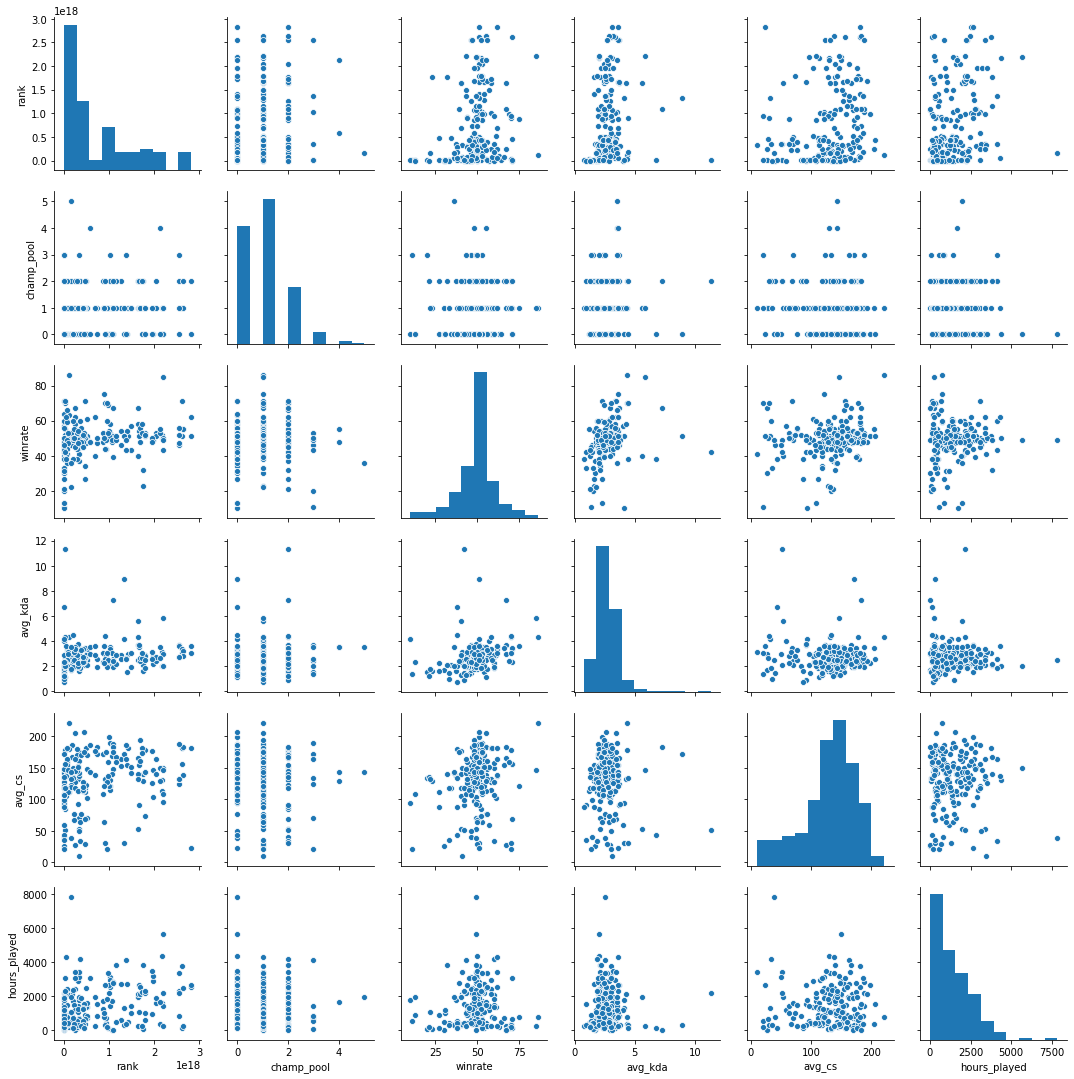

In [330]:
sns.pairplot(data_to_model)

In [333]:
lm = smf.ols('rank ~ champ_pool + winrate + avg_kda + avg_cs + hours_played', data=data_to_model)

fit = lm.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     7.499
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.01e-06
Time:                        21:59:25   Log-Likelihood:                -7998.3
No. Observations:                 188   AIC:                         1.601e+04
Df Residuals:                     182   BIC:                         1.603e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7.859e+17   2.99e+17     -2.624      0.009   -1.38e+18   -1.95e+17
champ_pool    7.957e+16   6.15e+16      1.295      0.197   -4.17e+16    2.01e+17
winrate       1.082e+16   5.29e+15      2.044      0.042    3.74e+14    2.13e+16
avg_kda        9.67e+16   4.73e+16      2.043      0.042    3.32e+15     1.9e+17
avg_cs        3.196e+15   1.25e+15      2.547      0.012     7.2e+14    5.67e+15
hours_played   1.83e+14   4.45e+13      4.111      0.000    9.52e+13    2.71e+14
==============================================================================
Omnibus:                       13.204   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.521
Skew:                           0.681   Prob(JB):                     0.000703
Kurtosis:                       2.996   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [332]:
data_to_model.columns

Index(['summoner_name', 'rank', 'champ_pool', 'winrate', 'avg_kda', 'avg_cs',
       'hours_played'],
      dtype='object')

In [327]:
data_to_model.hours_played = data_to_model.hours_played.astype(float, errors='ignore')

In [328]:
data_to_model.hours_played 

0       849.0
1      2292.0
2      2141.0
3       846.0
4      1141.0
5      2855.0
6       256.0
7      1947.0
8      2082.0
9       811.0
10      882.0
11      346.0
12      472.0
13     2676.0
14     3092.0
15     1438.0
16     2198.0
17     1504.0
18      735.0
19      200.0
20      105.0
21      777.0
22      678.0
23     1339.0
24      714.0
25     3401.0
26      561.0
27     2688.0
28     1367.0
29     2485.0
        ...  
170     327.0
171     393.0
172    3085.0
173    2306.0
174     104.0
175    3378.0
176    1305.0
177    1235.0
178     722.0
179     125.0
180    1963.0
181    1076.0
182       NaN
183    3068.0
184    1819.0
185     186.0
186    1929.0
187     226.0
188     771.0
189     996.0
190    2544.0
191    2667.0
192    3827.0
193     472.0
194     432.0
195    1151.0
196    2151.0
197    2305.0
198      19.0
199    2781.0
Name: hours_played, Length: 200, dtype: float64